In [1]:
# from google.colab import drive
# import os

# # Mount your entire Google Drive to '/content/drive'
# drive.mount('/content/drive')



In [2]:
# # Navigate to your workspace folder
# workspace_path = '/content/drive/MyDrive/Artificial Intelligence 2024 Final'
# # Check if the folder exists and create it if necessary
# if not os.path.exists(workspace_path):
#     os.makedirs(workspace_path)

# # Change the current working directory to your workspace folder
# os.chdir(workspace_path)

# EDA

## Step 1: Unzipping the Dataset
Unzip the dataset archive to extract all files.

In [3]:
import os
import zipfile
from pathlib import Path
zip_path = Path('Viet Nam Sign Language Detection.v6i.tensorflow.zip')
extract_to = Path('Vietnamese_hand_language_dataset')
if zip_path.exists():
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f'Dataset extracted to {extract_to}')
else:
    print('ZIP file not found!')

Dataset extracted to Vietnamese_hand_language_dataset


## Step 2: Explore Directory and Class Structure
Verify the dataset's folder structure and identify the classes.

In [4]:
def explore_directory_structure(base_path):
    for folder in ['train', 'test', 'valid']:
        folder_path = base_path / folder
        if folder_path.exists():
            print(f'{folder.upper()} contains {len(list(folder_path.iterdir()))} classes.')
        else:
            print(f'{folder.upper()} folder is missing!')
explore_directory_structure(extract_to)

TRAIN contains 8855 classes.
TEST contains 487 classes.
VALID contains 992 classes.


## Step 3: Count Images in Each Folder


### Organize Images into Folders by Class

In [5]:
import os
import shutil
import pandas as pd
from pathlib import Path

# Define the base dataset folder and the subfolders
base_dataset_path = Path("Vietnamese_hand_language_dataset")
folders = ["train", "test", "valid"]  # Subfolders containing images and `_annotations.csv`

# Process each folder (train, test, valid)
for folder in folders:
    folder_path = base_dataset_path / folder
    csv_file_path = folder_path / "_annotations.csv"

    # Check if the CSV file exists
    if not csv_file_path.exists():
        print(f"CSV file not found in {folder}, skipping...")
        continue

    # Read the CSV file
    annotations_df = pd.read_csv(csv_file_path)

    # Organize images into class folders within the same dataset folder
    for _, row in annotations_df.iterrows():
        image_file = folder_path / row['filename']
        class_label = row['class']
        class_folder = folder_path / class_label  # Subfolder for the class

        # Create class folder if it doesn't exist
        class_folder.mkdir(parents=True, exist_ok=True)

        # Move the image to the appropriate class folder
        if image_file.exists():
            shutil.move(str(image_file), class_folder / image_file.name)
        else:
            print(f"Image {image_file} not found in {folder}!")

    print(f"Images in {folder} folder have been organized into class subfolders.")

print("Organization complete.")


Images in train folder have been organized into class subfolders.
Images in test folder have been organized into class subfolders.
Images in valid folder have been organized into class subfolders.
Organization complete.


### Count the number of images for each class in `train`, `test`, and `valid` datasets.

In [6]:
def count_images_per_class(folder_path):
    class_counts = {}
    for cls_folder in folder_path.iterdir():
        if cls_folder.is_dir():
            class_counts[cls_folder.name] = len(list(cls_folder.glob('*.jpg')))
    return class_counts
train_counts = count_images_per_class(extract_to / 'train')
test_counts = count_images_per_class(extract_to / 'test')
valid_counts = count_images_per_class(extract_to / 'valid')
print(f'Train class counts: {len(train_counts)} classes')
print(f'Test class counts: {len(test_counts)} classes')
print(f'Valid class counts: {len(valid_counts)} classes')

Train class counts: 22 classes
Test class counts: 22 classes
Valid class counts: 22 classes


## Step 4: Class Distribution Visualizations
Visualize the number of images per class for `train`, `test`, and `valid` datasets.

C:\Users\ACER\AppData\Local\Temp\ipykernel_16640\1135426868.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Image Count', data=df, palette='viridis')


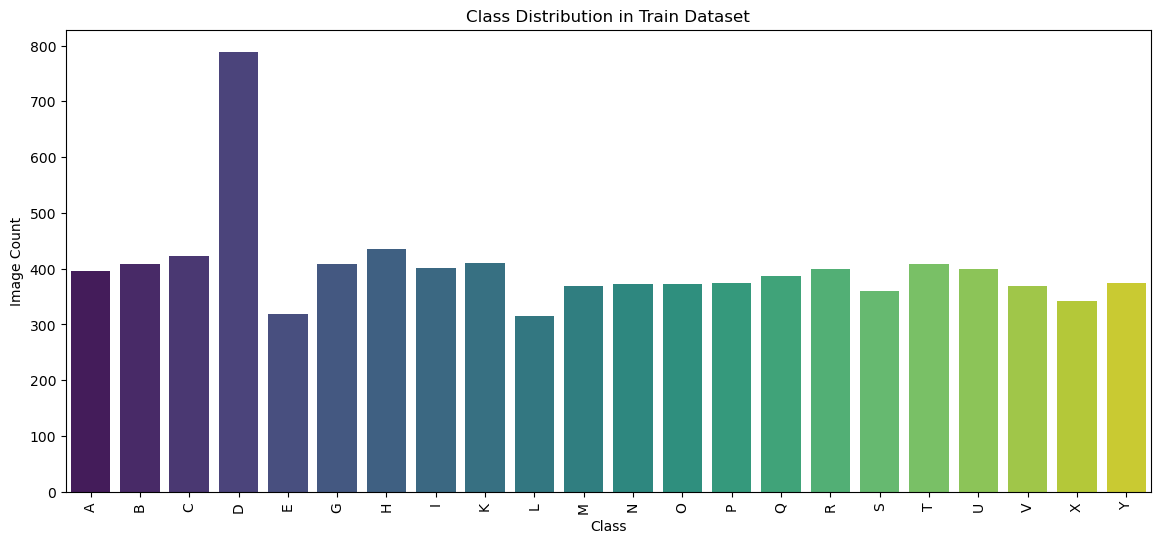

C:\Users\ACER\AppData\Local\Temp\ipykernel_16640\1135426868.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Image Count', data=df, palette='viridis')


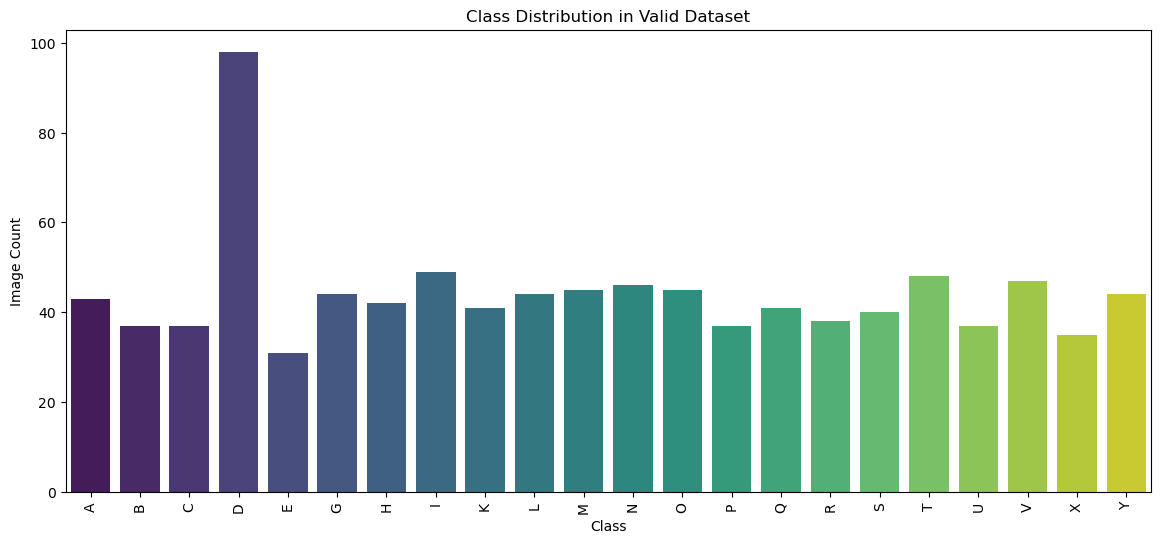

C:\Users\ACER\AppData\Local\Temp\ipykernel_16640\1135426868.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Image Count', data=df, palette='viridis')


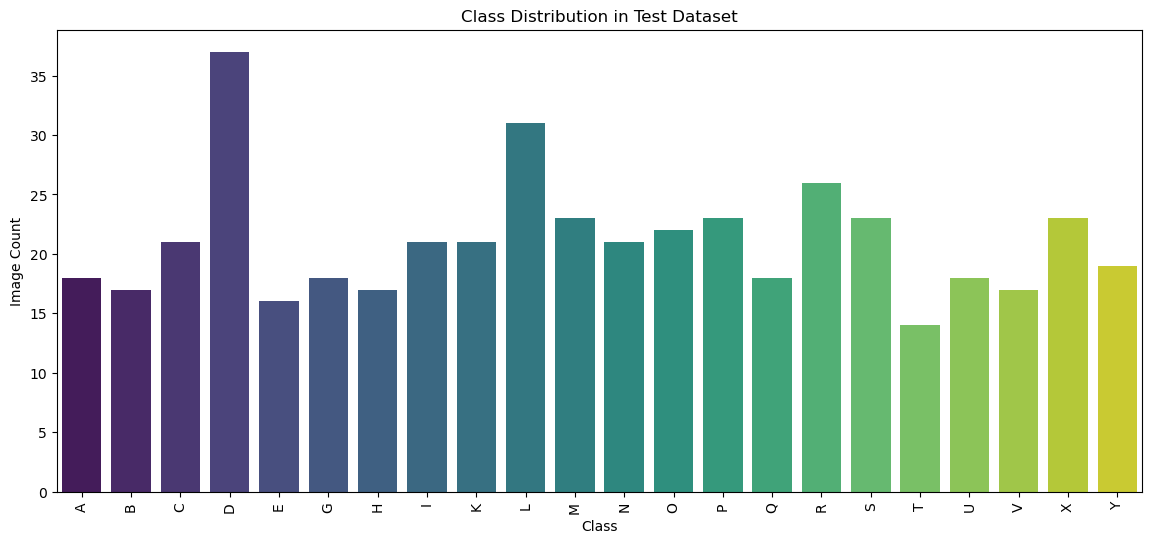

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_class_distribution(class_counts, title):
    df = pd.DataFrame(class_counts.items(), columns=['Class', 'Image Count']).sort_values(by='Class')
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Class', y='Image Count', data=df, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()
plot_class_distribution(train_counts, 'Class Distribution in Train Dataset')
plot_class_distribution(valid_counts, 'Class Distribution in Valid Dataset')
plot_class_distribution(test_counts, 'Class Distribution in Test Dataset')

## Step 5: Display Sample Images
Display random sample images from the `train` dataset.

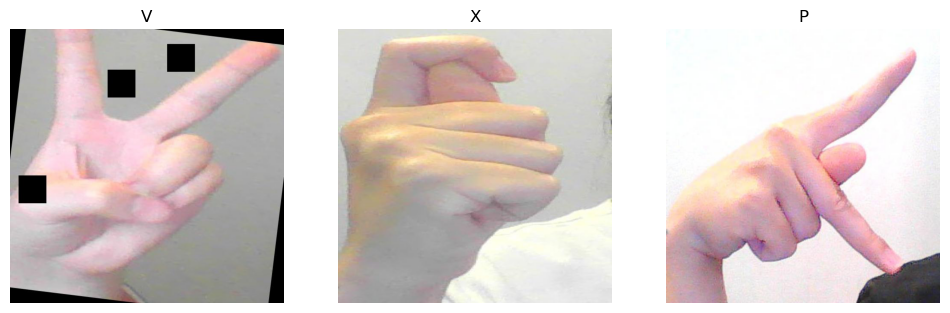

In [8]:
from PIL import Image
import random
def display_sample_images(folder_path, n=3):
    plt.figure(figsize=(12, 8))
    classes = [cls for cls in folder_path.iterdir() if cls.is_dir()]
    for i, cls in enumerate(random.sample(classes, n)):
        sample_image = random.choice(list(cls.glob('*.jpg')))
        img = Image.open(sample_image)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(cls.name)
        plt.axis('off')
    plt.show()
display_sample_images(extract_to / 'train')

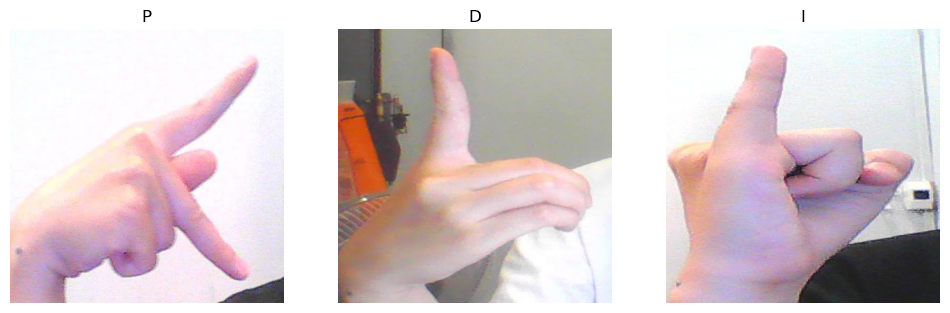

In [9]:
display_sample_images(extract_to / 'test')

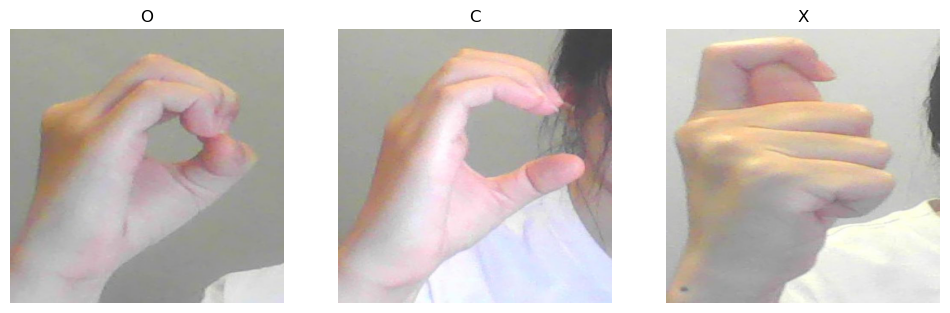

In [10]:
display_sample_images(extract_to / 'valid')

## Step 6: Analyze Image Dimensions
Inspect the dimensions of the images to ensure consistency.

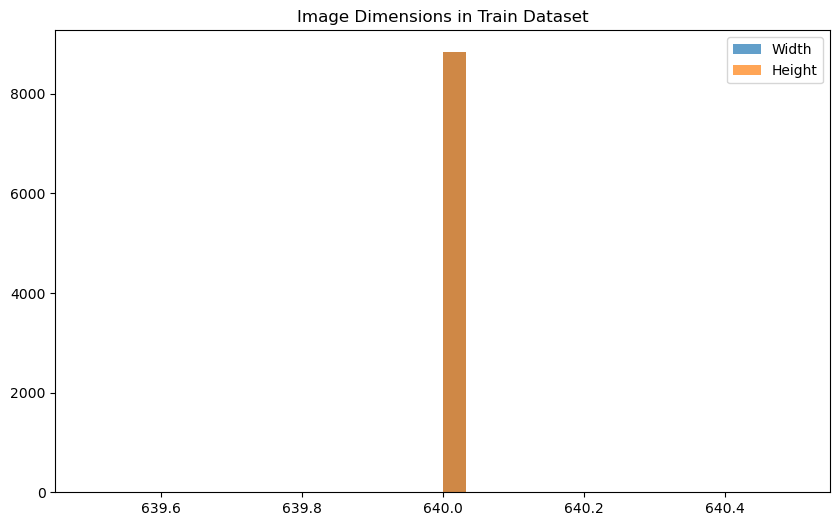

In [11]:
def analyze_image_dimensions(folder_path):
    dimensions = []
    for cls_folder in folder_path.iterdir():
        if cls_folder.is_dir():
            for image_file in cls_folder.glob('*.jpg'):
                with Image.open(image_file) as img:
                    dimensions.append(img.size)
    return dimensions
train_dimensions = analyze_image_dimensions(extract_to / 'train')
widths, heights = zip(*train_dimensions)
plt.figure(figsize=(10, 6))
plt.hist(widths, bins=30, alpha=0.7, label='Width')
plt.hist(heights, bins=30, alpha=0.7, label='Height')
plt.title('Image Dimensions in Train Dataset')
plt.legend()
plt.show()

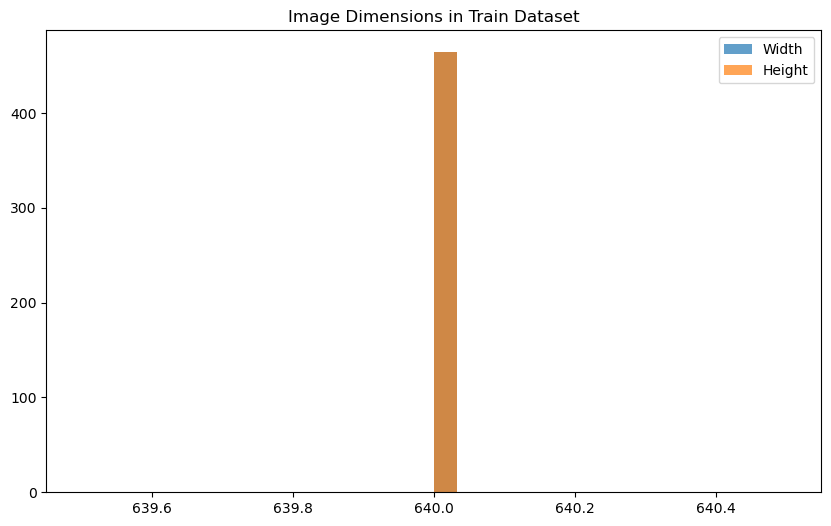

In [12]:
test_dimensions = analyze_image_dimensions(extract_to / 'test')
widths_test, heights_test = zip(*test_dimensions)
plt.figure(figsize=(10, 6))
plt.hist(widths_test, bins=30, alpha=0.7, label='Width')
plt.hist(heights_test, bins=30, alpha=0.7, label='Height')
plt.title('Image Dimensions in Train Dataset')
plt.legend()
plt.show()

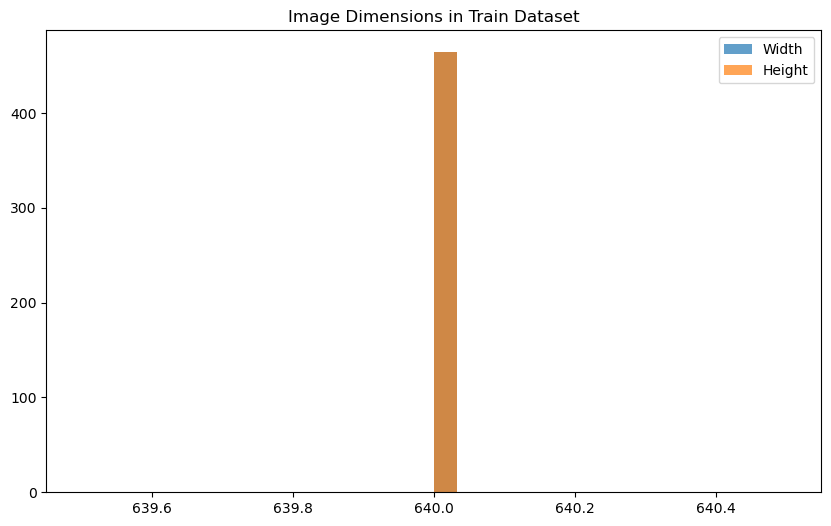

In [13]:
valid_dimensions = analyze_image_dimensions(extract_to / 'valid')
widths_valid, heights_valid = zip(*test_dimensions)
plt.figure(figsize=(10, 6))
plt.hist(widths_valid, bins=30, alpha=0.7, label='Width')
plt.hist(heights_valid, bins=30, alpha=0.7, label='Height')
plt.title('Image Dimensions in Train Dataset')
plt.legend()
plt.show()

# Traning model

## Custom CNN with PyTorch

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from pathlib import Path

In [15]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset paths
data_dir = Path("Vietnamese_hand_language_dataset")
batch_size = 32
img_size = 640

# Data transforms
transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load datasets
train_data = datasets.ImageFolder(data_dir / 'train', transform=transform)
valid_data = datasets.ImageFolder(data_dir / 'valid', transform=transform)
test_data = datasets.ImageFolder(data_dir / 'test', transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [16]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from pathlib import Path

class SignLanguageCNN(nn.Module):
    def __init__(self, num_classes):
        super(SignLanguageCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # First convolutional block
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4),  # Reduce size early (640x640 -> 160x160)

            # Second convolutional block
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: (64, 80, 80)

            # Third convolutional block
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: (128, 40, 40)

            # Fourth convolutional block
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),  # Output: (256, 20, 20)
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),

            # Fully connected layers
            nn.Linear(256 * 20 * 20, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x


In [17]:
# Initialize model
num_classes = len(train_data.classes)
model = SignLanguageCNN(num_classes).to(device)


In [18]:
# Define optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [19]:
# Define checkpoint directory
checkpoint_dir = Path("checkpoints")
checkpoint_dir.mkdir(exist_ok=True)
last_checkpoint = checkpoint_dir / "last_checkpoint_custom_CNN.pth"

# Function to save a checkpoint
def save_checkpoint(epoch, model, optimizer, loss, checkpoint_path, keep_last=1):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)
    print(f"Checkpoint saved: {checkpoint_path}")
    checkpoints = sorted(checkpoint_dir.glob("*.pth"), key=lambda x: x.stat().st_mtime, reverse=True)
    for old_checkpoint in checkpoints[keep_last:]:
        old_checkpoint.unlink()
        print(f"Deleted old checkpoint: {old_checkpoint}")


# Function to load a checkpoint
def load_checkpoint(checkpoint_dir, model, optimizer):
    # Find latest checkpoint
    latest_checkpoint = max(checkpoint_dir.glob("*.pth"), key=lambda x: x.stat().st_mtime, default=None)
    if latest_checkpoint is None:
        print("No checkpoint found. Starting training from scratch.")
        return 0, None

    # Load latest checkpoint
    print(f"Loading latest checkpoint: {latest_checkpoint}")
    checkpoint = torch.load(latest_checkpoint)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Checkpoint loaded: {latest_checkpoint} (Epoch {start_epoch})")
    return start_epoch, loss

In [20]:
final_custom_CNN_model_path = Path("./models/custom_CNN_model.pth")

if final_custom_CNN_model_path.exists():
    print("Final model already exists. Loading the model...")
    model.load_state_dict(torch.load(final_custom_CNN_model_path))
    model.eval()
    print("Model loaded successfully. Ready for use.")
else:
    print("No final model found. Starting training...")

    # Load the latest checkpoint
    start_epoch, _ = load_checkpoint(checkpoint_dir, model, optimizer)

    # Training parameters
    epochs = 50
    patience = 5  # Number of epochs to wait for improvement
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(start_epoch, epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate average training loss
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {avg_loss:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for val_images, val_labels in valid_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                val_loss += criterion(val_outputs, val_labels).item()

        avg_val_loss = val_loss / len(valid_loader)
        print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {avg_val_loss:.4f}")

        # Early stopping logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            # Save the best model
            torch.save(model.state_dict(), final_custom_CNN_model_path)
            print("Validation loss improved. Model saved.")
        else:
            patience_counter += 1
            print(f"No improvement in validation loss. Patience counter: {patience_counter}/{patience}")
            if patience_counter >= patience:
                print("Early stopping triggered. Stopping training.")
                break

        # Save checkpoint
        checkpoint_path = checkpoint_dir / f"checkpoint_epoch_{epoch + 1}.pth"
        save_checkpoint(epoch + 1, model, optimizer, avg_loss, checkpoint_path)

    print("Training complete.")

    # save final model
    torch.save(model.state_dict(), final_custom_CNN_model_path)
    print("Final model saved.")


Final model already exists. Loading the model...
Model loaded successfully. Ready for use.


In [21]:
# Evaluation
def evaluate_model(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Evaluate the model on the test dataset
test_accuracy = evaluate_model(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 100.00%
